In [ ]:
"""
This code belongs to the paper:
-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 21 Storey building.
"""

# Drift 21 Equation discovery

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
#     # for the signum or sign operator
#     for i in range(len(xt)):
#         ind = ind+1
#         new = np.vstack(np.sign(xt[i,:]))+0.0001
#         D = np.append(D, new, axis=1)
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)

        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
            
    ind = len(D[0])
    
    return D, ind

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
  
        y1.append(x[-1,:])     # Displacement
        y2.append(x[-2,:])      
        y3.append(x[-3,:])     # Displacement
        y4.append(x[-4,:])
        y5.append(x[-5,:])
        y6.append(x[-6,:])
        y7.append(x[-7,:])
        y8.append(x[-8,:])
        

        zint1 = x[-1,0:-1]
        xfinal1 = x[-1,1:] 
        xmz1 = (xfinal1 - zint1)
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 

    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)

    time = t[0:-1]
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, y7, y8, time

In [3]:
T = 1
dof = 21
x_initial = np.zeros(2*dof)
x_initial[0]=0.5
x_initial[2]=0.48
x_initial[4]=0.45999999999999996
x_initial[6]=0.43999999999999995
x_initial[8]=0.41999999999999993
x_initial[10]=0.3999999999999999
x_initial[12]=0.3799999999999999
x_initial[14]=0.3599999999999999
x_initial[16]=0.33999999999999986
x_initial[18]=0.31999999999999984
x_initial[20]=0.2999999999999998
x_initial[22]=0.2799999999999998
x_initial[24]=0.2599999999999998
x_initial[26]=0.2399999999999998
x_initial[28]=0.2199999999999998
x_initial[30]=0.19999999999999982
x_initial[32]=0.17999999999999983
x_initial[34]=0.15999999999999984
x_initial[36]=0.13999999999999985
x_initial[38]=0.11999999999999984
x_initial[40]=0.0999999999999998

In [5]:
xdrift21, xdrift20, xdrift19, xdiff21, xdiff20, xdiff19, y42, y41, y40, y39, y38, y37, y36, y35, t_eval = M_DOF_sys(x_initial, dof, T)

In [7]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y42)):
    data = np.row_stack((y42[j,0:-1], y41[j,0:-1], y40[j,0:-1], y39[j,0:-1], y38[j,0:-1], y37[j,0:-1], y36[j,0:-1], y35[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
# xdts = xdrift1

In [8]:
xdts = xdrift21
D = Dictionary

In [10]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [11]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[38.0],[39.0],[40.0],[70.0],[74.0]]), 'Value': matlab.double([[-2.006861900352611],[-3000.9351334302573],[1.955435869293901],[3001.6425152696575],[-0.0005316165550079704],[-0.06847279658601516],[0.007292289693904847],[0.003027369591636891],[-0.07048864628087845]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1

In [13]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC



In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)

-2.008719918607018
-3000.0396043907836
1.979772702759871
3000.5174409579395


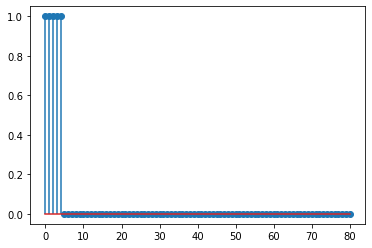

In [17]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 20 

In [22]:
xdts = xdrift20

In [23]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[16.0],[18.0],[30.0],[38.0],[55.0],[59.0]]), 'Value': matlab.double([[1.9245637717452329],[3000.8756255134244],[-3.968401382928298],[-6000.382786531986],[2.0240253854757784],[3004.9160091095187],[0.05128842184176563],[0.005675534209267444],[0.11469637695506867],[-0.005034910611998336],[-0.03264839476929258],[-17.452703961090222]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)

2.0175432365137485
2998.2919462168093
-4.0000162401891055
-5997.282817187615
1.990635272720442
2998.9711918436124


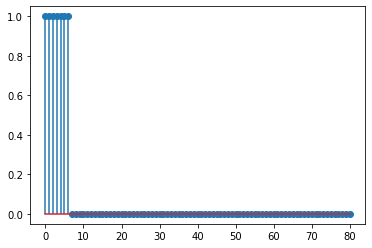

In [27]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 19

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run
    
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    
    xz2 = []
    xz3 = []
    xz4 = []
    xz5 = []
    
    xzs22 = []
    xzs33 = []
    xzs44 = []
    xzs55 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            

        y3.append(x[-3,:])
        y4.append(x[-4,:])
        y5.append(x[-5,:])     # Displacement
        y6.append(x[-6,:])
        y7.append(x[-7,:])     # Displacement
        y8.append(x[-8,:])
        y9.append(x[-9,:])
        y10.append(x[-10,:])
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
                  
        zint4 = x[-7, 0:-1]
        xfinal4 = x[-7, 1:] 
        xmz4 = (xfinal4 - zint4)
        
        zint5 = x[-9, 0:-1]
        xfinal5 = x[-9, 1:] 
        xmz5 = (xfinal5 - zint5)
        
        xz2.append(xmz2)
        xz3.append(xmz3)
        xz4.append(xmz4)
        xz5.append(xmz5)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        xmzsq44 = np.multiply(xmz4, xmz4)
        xzs44.append(xmzsq44)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
    
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    xz4 = pow(dt,-1)*np.mean(np.array(xz4), axis = 0)
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)

    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    xzs44 = pow(dt,-1)*np.mean(np.array(xzs44), axis = 0)
    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)

    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)

    time = t[0:-1]
    return xz2, xz3, xz4, xz5, xzs22, xzs33, xzs44, xzs55, y3, y4, y5, y6, y7, y8, y9, y10, time

In [6]:
xz2, xz3, xz4, xz5, xzs22, xzs33, xzs44, xzs55, y3, y4, y5, y6, y7, y8, y9, y10, time = M_DOF_sys(x_initial, dof, T)

In [7]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y3)):
    data = np.row_stack((y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1], y9[j,0:-1], y10[j,0:-1]))
    Dtemp, nl = library(data, 3, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [35]:
xdts = xz3
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')
Dict.shape

In [38]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[18.0],[46.0],[50.0],[80.0],[85.0],[162.0],[191.0]]), 'Value': matlab.double([[1.971640776094826],[2999.918685044836],[-3.9860009321559873],[-6000.1639484509815],[2.021796951431441],[3000.132724500025],[0.3133885190078531],[6.858077895456735e-05],[-0.000334095019638349],[0.0037787034343005153],[0.08142730778621575],[-7.995527864155697e-05],[-0.059731277141923986]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.996019659650603
2998.1820045623476
-3.987879225886737
-5995.060773070505
1.9985362835677112
2996.4584540504925


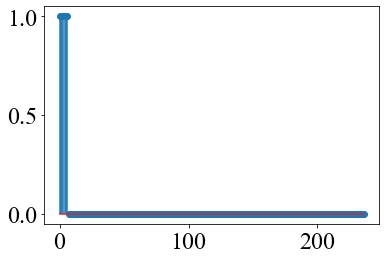

In [43]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 18

In [19]:
xdts = xz4

In [20]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[38.0],[43.0],[81.0],[114.0],[201.0],[205.0],[206.0],[212.0]]), 'Value': matlab.double([[2.014572147002297],[3000.554776174483],[-4.04529809559544],[-6000.372530724579],[2.034690306655402],[2999.8113049545354],[0.0002979398066879867],[-0.0008651734151512249],[-0.17074489356412223],[-8.567293421038287e-05],[1.8170870093626432],[-3.1776992804284796],[0.005053087582169389],[-0.0024869715050231276]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.9923740734765514
2996.245771840961
-4.003049477280969
-5992.0037657290295
2.0103310724543872
2995.17468795253


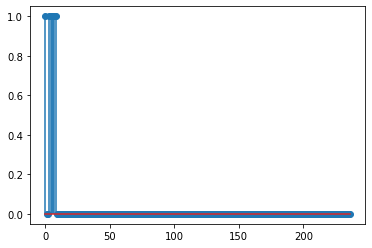

In [23]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 17

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run
    
    y7 = [] 
    y8 = []
    y9 = []
    y10 = []
    y11 = []
    y12 = []
    y13 = []
    y14 = []
    
    xz5 = []
    xz6 = []
    
    xzs55 = []
    xzs66 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y7.append(x[-7,:])
        y8.append(x[-8,:])
        y9.append(x[-9,:])         # Displacement
        y10.append(x[-10,:])
        y11.append(x[-11,:])       # Displacement
        y12.append(x[-12,:])
        y13.append(x[-13,:])
        y14.append(x[-14,:])
        
        zint5 = x[-9, 0:-1]        # Velocity
        xfinal5 = x[-9, 1:] 
        xmz5 = (xfinal5 - zint5)
        
        zint6 = x[-11, 0:-1]       # Velocity
        xfinal6 = x[-11, 1:] 
        xmz6 = (xfinal6 - zint6) 

        xz5.append(xmz5)
        xz6.append(xmz6)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
        xmzsq66 = np.multiply(xmz6, xmz6)
        xzs66.append(xmzsq66)
        
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)
    xz6 = pow(dt,-1)*np.mean(np.array(xz6), axis = 0)

    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)
    xzs66 = pow(dt,-1)*np.mean(np.array(xzs66), axis = 0)
    
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y11)
    y12 = np.array(y12)
    y13 = np.array(y13)
    y14 = np.array(y14)

    time = t[0:-1]
    return xz5, xz6, xzs55, xzs66, y7, y8, y9, y10, y11, y12, y13, y14, time

In [4]:
xz5, xz6, xzs55, xzs66, y7, y8, y9, y10, y11, y12, y13, y14, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y7)):
    data = np.row_stack((y7[j,0:-1], y8[j,0:-1], y9[j,0:-1], y10[j,0:-1], y11[j,0:-1], y12[j,0:-1], y13[j,0:-1], y14[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz5
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[12.0],[21.0],[36.0],[41.0],[50.0],[52.0],[53.0],[65.0],[66.0]]), 'Value': matlab.double([[2.033539056894764],[2999.7610656679744],[-4.079755126590854],[-5998.3708531638395],[1.932399667958241],[2998.517851294281],[0.011670210662141451],[-0.1813449179949145],[0.005923346242016202],[0.1963554969074322],[0.0048477019934828535],[0.006493435935558107],[-0.08711009774904108],[2.323518863932262],[0.0041219194407023626]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.9903495270787748
2998.0981101181233
-3.994933600084622
-5996.061077113376
1.9677395409015634
2998.1635345032882


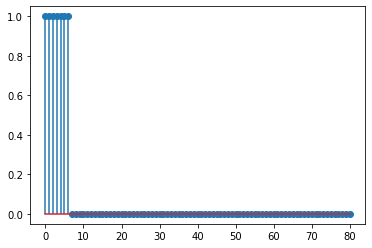

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 16

In [16]:
xdts = xz6

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[26.0],[39.0],[45.0],[49.0],[52.0],[55.0],[62.0],[68.0],[80.0],[81.0]]), 'Value': matlab.double([[2.0959426456424293],[2999.727793293233],[-4.001442517484647],[-6000.556072408731],[1.9939201811075118],[3001.6187038378876],[0.19320196714360427],[-0.31267773839639046],[-4.337310720837925],[9.605594164044993],[0.005572047928262358],[-0.30480826975027725],[-0.19026772358491065],[0.0028879369199329217],[0.1589724888648828],[-8.043439561294013]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

2.0184651208568294
2998.6859393507852
-4.013114574041832
-5999.281885073903
2.0082113462257722
3000.7909039506276


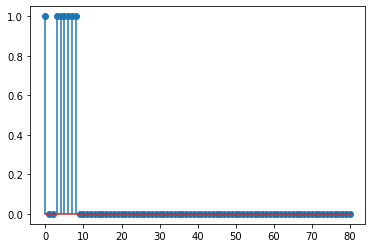

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 15

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y11 = []  
    y12 = []
    y13 = []
    y14 = []
    y15 = []
    y16 = []
    y17 = []
    y18 = []
    
    xz7 = []
    xz8 = []
    
    xzs77 = []
    xzs88 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y11.append(x[-11,:])       
        y12.append(x[-12,:])
        y13.append(x[-13,:])       # Displacement
        y14.append(x[-14,:])
        y15.append(x[-15,:])       # Displacement     
        y16.append(x[-16,:])
        y17.append(x[-17,:])       
        y18.append(x[-18,:])

        
        zint7 = x[-13, 0:-1]        # Velocity
        xfinal7 = x[-13, 1:] 
        xmz7 = (xfinal7 - zint7)
        
        zint8 = x[-15, 0:-1]       # Velocity
        xfinal8 = x[-15, 1:] 
        xmz8 = (xfinal8 - zint8) 

        xz7.append(xmz7)
        xz8.append(xmz8)
        
        xmzsq77 = np.multiply(xmz7, xmz7)
        xzs77.append(xmzsq77)
        
        xmzsq88 = np.multiply(xmz8, xmz8)
        xzs88.append(xmzsq88)
        
    xz7 = pow(dt,-1)*np.mean(np.array(xz7), axis = 0)
    xz8 = pow(dt,-1)*np.mean(np.array(xz8), axis = 0)

    xzs77 = pow(dt,-1)*np.mean(np.array(xzs77), axis = 0)
    xzs88 = pow(dt,-1)*np.mean(np.array(xzs88), axis = 0)

    y11 = np.array(y11)
    y12 = np.array(y12)
    y13 = np.array(y13)
    y14 = np.array(y14)
    y15 = np.array(y15)
    y16 = np.array(y16)
    y17 = np.array(y17)
    y18 = np.array(y18)

    time = t[0:-1]
    return xz7, xz8, xzs77, xzs88, y11, y12, y13, y14, y15, y16, y17, y18, time

In [4]:
xz7, xz8, xzs77, xzs88, y11, y12, y13, y14, y15, y16, y17, y18, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y11)):
    data = np.row_stack((y11[j,0:-1], y12[j,0:-1], y13[j,0:-1], y14[j,0:-1], y15[j,0:-1], y16[j,0:-1], y17[j,0:-1], y18[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
# xdts = xdrift1

In [6]:
xdts = xz7
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')
Dict.shape

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[12.0],[20.0],[23.0],[32.0],[34.0],[35.0],[38.0],[50.0],[52.0],[54.0],[68.0]]), 'Value': matlab.double([[2.0119161447653378],[2999.5218143027996],[-4.045074900803292],[-5998.974325555198],[2.019304002825955],[2999.563784165592],[-0.0099578613427715],[-0.0035523699701256483],[0.10576976769402993],[0.00018481147644458417],[-0.004270842585944765],[0.09997319701360295],[0.003947289235378657],[-0.0050291825880500185],[0.004327021558095369],[0.0018012634243125376],[-0.003002936464725685]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

2.0315832268965677
2998.1430900690357
-4.0125547137838815
-5995.891507106089
2.0348119808240726
2997.396188667701


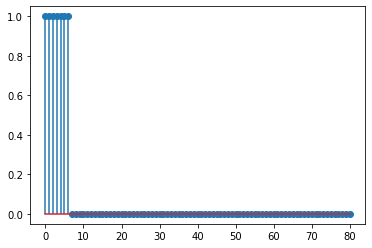

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 14

In [16]:
xdts = xz8

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[29.0],[50.0],[51.0],[54.0],[57.0]]), 'Value': matlab.double([[1.980751640968397],[2998.8798008168383],[-3.9610543953859305],[-5998.324297335633],[1.9975962216490741],[2998.976928482143],[0.24899280109261632],[-0.0008982186989087167],[0.16037377146339757],[-0.003134036228409543],[-0.08658227548812239]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.9858062831074283
2996.759148055798
-3.9835494379162357
-5994.755364268647
2.0080597987567144
2997.543372325106


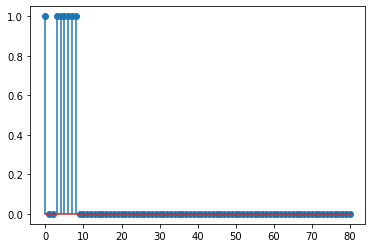

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 13

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y15 = []
    y16 = []
    y17 = []
    y18 = []
    y19 = []  
    y20 = []
    y21 = []
    y22 = []
    
    xz9 = []
    xz10 = []
    
    xzs9 = []
    xzs10 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y15.append(x[-15,:])           
        y16.append(x[-16,:])
        y17.append(x[-17,:])       # Displacement 
        y18.append(x[-18,:])
        y19.append(x[-19,:])       # Displacement         
        y20.append(x[-20,:])
        y21.append(x[-21,:])           
        y22.append(x[-22,:])

        
        zint9 = x[-17, 0:-1]        # Velocity
        xfinal9 = x[-17, 1:] 
        xmz9 = (xfinal9 - zint9)
        
        zint10 = x[-19, 0:-1]       # Velocity
        xfinal10 = x[-19, 1:] 
        xmz10 = (xfinal10 - zint10) 

        xz9.append(xmz9)
        xz10.append(xmz10)
        
        xmzsq9 = np.multiply(xmz9, xmz9)
        xzs9.append(xmzsq9)
        
        xmzsq10 = np.multiply(xmz10, xmz10)
        xzs10.append(xmzsq10)
        
    xz9 = pow(dt,-1)*np.mean(np.array(xz9), axis = 0)
    xz10 = pow(dt,-1)*np.mean(np.array(xz10), axis = 0)

    xzs9 = pow(dt,-1)*np.mean(np.array(xzs9), axis = 0)
    xzs10 = pow(dt,-1)*np.mean(np.array(xzs10), axis = 0)

    y15 = np.array(y15)
    y16 = np.array(y16)
    y17 = np.array(y17)
    y18 = np.array(y18)
    y19 = np.array(y19)
    y20 = np.array(y20)
    y21 = np.array(y21)
    y22 = np.array(y22)

    time = t[0:-1]
    return xz9, xz10, xzs9, xzs10, y15, y16, y17, y18, y19, y20, y21, y22, time

In [4]:
xz9, xz10, xzs9, xzs10, y15, y16, y17, y18, y19, y20, y21, y22, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y15)):
    data = np.row_stack((y15[j,0:-1], y16[j,0:-1], y17[j,0:-1], y18[j,0:-1], y19[j,0:-1], y20[j,0:-1], y21[j,0:-1], y22[j,0:-1], ))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
# xdts = xdrift1

In [6]:
xdts = xz9
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[33.0],[39.0],[48.0],[52.0],[76.0]]), 'Value': matlab.double([[1.9734836994073524],[2999.8463065383085],[-3.9482023091871885],[-5999.718297830694],[1.9856934802159232],[2999.050306674468],[-1.9453667493292295],[-0.11333342585582594],[0.13947021908553844],[0.0003328719689753488],[0.1647827993262003]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.979841912935129
2997.5049710046123
-3.97780877166546
-5996.012284491217
1.9838493670140263
2998.373479074605


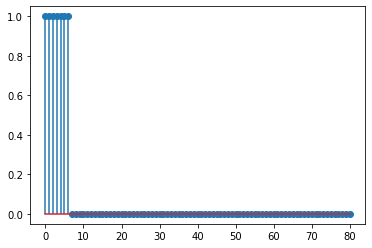

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 12

In [16]:
xdts = xz10

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[16.0],[22.0],[36.0],[46.0],[60.0],[65.0],[80.0]]), 'Value': matlab.double([[2.0447564233003543],[2999.2185265151347],[-4.009745156494036],[-5999.05206876477],[1.9953511288090697],[3001.280739132953],[-0.055632853803769616],[-0.0023030094599451835],[-0.007147257590661628],[0.059999827987747986],[-0.1854389433133679],[2.468057429854742],[-0.3117260435927782]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.9833756187404543
2998.0413562761296
-3.9941528472406467
-5995.655950234483
2.0060493894186107
2998.14921073922


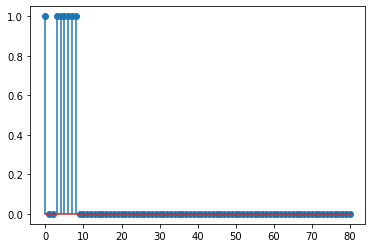

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    
    y19 = []  
    y20 = []
    y21 = []
    y22 = []
    y23 = []
    y24 = []
    y25 = []
    y26 = []
    
    xz11 = []
    xz12 = []
    
    xzs11 = []
    xzs12 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y19.append(x[-19,:])                
        y20.append(x[-20,:])
        y21.append(x[-21,:])       # Displacement    
        y22.append(x[-22,:])
        y23.append(x[-23,:])       # Displacement             
        y24.append(x[-24,:])
        y25.append(x[-25,:])                
        y26.append(x[-26,:])

        
        zint11 = x[-21, 0:-1]        # Velocity
        xfinal11 = x[-21, 1:] 
        xmz11 = (xfinal11 - zint11)
        
        zint12 = x[-23, 0:-1]       # Velocity
        xfinal12 = x[-23, 1:] 
        xmz12 = (xfinal12 - zint12) 

        xz11.append(xmz11)
        xz12.append(xmz12)
        
        xmzsq11 = np.multiply(xmz11, xmz11)
        xzs11.append(xmzsq11)
        
        xmzsq12 = np.multiply(xmz12, xmz12)
        xzs12.append(xmzsq12)
        
    xz11 = pow(dt,-1)*np.mean(np.array(xz11), axis = 0)
    xz12 = pow(dt,-1)*np.mean(np.array(xz12), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs12 = pow(dt,-1)*np.mean(np.array(xzs12), axis = 0)

    y19 = np.array(y19)
    y20 = np.array(y20)
    y21 = np.array(y21)
    y22 = np.array(y22)
    y23 = np.array(y23)
    y24 = np.array(y24)
    y25 = np.array(y25)
    y26 = np.array(y26)

    time = t[0:-1]
    return xz11, xz12, xzs11, xzs12, y19, y20, y21, y22, y23, y24, y25, y26, time

In [4]:
xz11, xz12, xzs11, xzs12, y19, y20, y21, y22, y23, y24, y25, y26, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y19)):
    data = np.row_stack((y19[j,0:-1], y20[j,0:-1], y21[j,0:-1], y22[j,0:-1], y23[j,0:-1], y24[j,0:-1], y25[j,0:-1], y26[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz11
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[17.0],[19.0],[36.0],[37.0],[47.0],[58.0]]), 'Value': matlab.double([[1.994625349452847],[2997.3898078476946],[-4.0596894121445946],[-5997.742091224681],[2.0144432137445816],[3000.7661346232603],[-1.0547116883334198],[0.06918621703758918],[0.0014317868808571184],[0.25887164578270705],[-1.3121002172909069],[-0.15011188591632532]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

2.010651978135515
2995.303927591743
-3.991046283337433
-5992.480161357249
2.011565108911237
2996.3421381542726


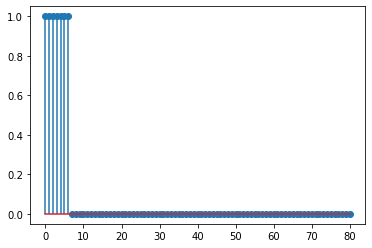

In [15]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 10

In [17]:
xdts = xz12

In [18]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[10.0],[12.0],[25.0],[34.0],[35.0],[56.0],[58.0],[70.0],[78.0],[81.0]]), 'Value': matlab.double([[2.0947562301891995],[3002.303157061329],[-3.9335191417010056],[-6002.806203541559],[2.0265727102756466],[2996.855785126185],[0.047042920776786463],[0.01137534571845723],[-0.1255988884166305],[-0.005407371619823657],[-0.22010065225687234],[-0.009606439452144464],[0.20209545515724933],[-0.0028363828214667966],[0.03867282519695779],[11.549612913779638]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.9891507455464754
2997.225156924738
-3.9954768388570536
-5993.755010355408
1.9979328203945448
2996.4422466945043


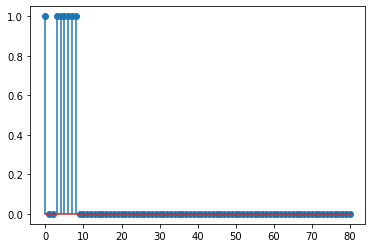

In [21]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y23 = []
    y24 = []
    y25 = []
    y26 = []
    y27 = []
    y28 = []
    y29 = []
    y30 = []
    
    xz13 = []
    xz14 = []
    
    xzs13 = []
    xzs14 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y23.append(x[-23,:])                
        y24.append(x[-24,:])
        y25.append(x[-25,:])         # Displacement      
        y26.append(x[-26,:])
        y27.append(x[-27,:])         # Displacement       
        y28.append(x[-28,:])
        y29.append(x[-29,:])                
        y30.append(x[-30,:])

        
        zint13 = x[-25, 0:-1]        # Velocity
        xfinal13 = x[-25, 1:] 
        xmz13 = (xfinal13 - zint13)
        
        zint14 = x[-27, 0:-1]        # Velocity
        xfinal14 = x[-27, 1:] 
        xmz14 = (xfinal14 - zint14) 

        xz13.append(xmz13)
        xz14.append(xmz14)
        
        xmzsq13 = np.multiply(xmz13, xmz13)
        xzs13.append(xmzsq13)
        
        xmzsq14 = np.multiply(xmz14, xmz14)
        xzs14.append(xmzsq14)
        
    xz13 = pow(dt,-1)*np.mean(np.array(xz13), axis = 0)
    xz14 = pow(dt,-1)*np.mean(np.array(xz14), axis = 0)

    xzs13 = pow(dt,-1)*np.mean(np.array(xzs13), axis = 0)
    xzs14 = pow(dt,-1)*np.mean(np.array(xzs14), axis = 0)

    y23 = np.array(y23)
    y24 = np.array(y24)
    y25 = np.array(y25)
    y26 = np.array(y26)
    y27 = np.array(y27)
    y28 = np.array(y28)
    y29 = np.array(y29)
    y30 = np.array(y30)

    time = t[0:-1]
    return xz13, xz14, xzs13, xzs14, y23, y24, y25, y26, y27, y28, y29, y30, time

In [4]:
xz13, xz14, xzs13, xzs14, y23, y24, y25, y26, y27, y28, y29, y30, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y23)):
    data = np.row_stack((y23[j,0:-1], y24[j,0:-1], y25[j,0:-1], y26[j,0:-1], y27[j,0:-1], y28[j,0:-1], y29[j,0:-1], y30[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz13
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[16.0],[21.0],[24.0],[41.0],[50.0],[51.0],[54.0],[80.0]]), 'Value': matlab.double([[2.0494177709605625],[2999.5208222694428],[-3.973132414038348],[-6000.241308422703],[2.0673863626717743],[3000.6117374653804],[0.032185509489896354],[-0.23441800290747386],[-0.00038022529537210594],[-0.12907590797748886],[-0.004037861593118605],[0.02023941498377549],[-0.007232801914751861],[-0.03153903480120698]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.994151369277238
2996.4682007949355
-4.008009864622892
-5994.161063061209
1.9737644876973743
2997.002237861422


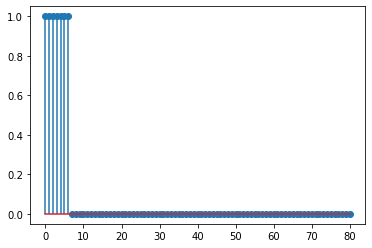

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 8

In [16]:
xdts = xz14

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[14.0],[19.0],[41.0],[50.0],[52.0],[69.0],[77.0],[80.0]]), 'Value': matlab.double([[1.9948326308230002],[3000.2440507069778],[-4.03680022247471],[-5998.896421590446],[2.0229549581926616],[3001.244773539589],[0.019170846525850334],[0.13270665801793],[0.04569823721204426],[0.006056402735104848],[0.00207608565838798],[-0.08061220889115954],[-2.9906168799353163],[-0.2271498449270689]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

2.0131723478710017
2996.496308680628
-3.9880382130431014
-5992.291368239411
1.9961713333240416
2995.8048619707147


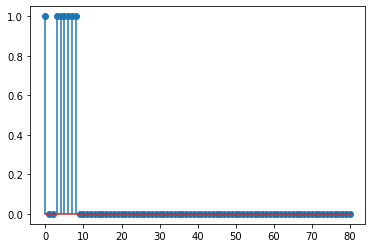

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y27 = []
    y28 = []
    y29 = []
    y30 = []
    y31 = []
    y32 = []
    y33 = []
    y34 = []
    
    xz15 = []
    xz16 = []
    
    xzs15 = []
    xzs16 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y27.append(x[-27,:])               
        y28.append(x[-28,:])
        y29.append(x[-29,:])         # Displacement     
        y30.append(x[-30,:])
        y31.append(x[-31,:])         # Displacement       
        y32.append(x[-32,:])
        y33.append(x[-33,:])               
        y34.append(x[-34,:])

        
        zint15 = x[-29, 0:-1]        # Velocity
        xfinal15 = x[-29, 1:] 
        xmz15 = (xfinal15 - zint15)
        
        zint16 = x[-31, 0:-1]        # Velocity
        xfinal16 = x[-31, 1:] 
        xmz16 = (xfinal16 - zint16) 

        xz15.append(xmz15)
        xz16.append(xmz16)
        
        xmzsq15 = np.multiply(xmz15, xmz15)
        xzs15.append(xmzsq15)
        
        xmzsq16 = np.multiply(xmz16, xmz16)
        xzs16.append(xmzsq16)
        
    xz15 = pow(dt,-1)*np.mean(np.array(xz15), axis = 0)
    xz16 = pow(dt,-1)*np.mean(np.array(xz16), axis = 0)

    xzs15 = pow(dt,-1)*np.mean(np.array(xzs15), axis = 0)
    xzs16 = pow(dt,-1)*np.mean(np.array(xzs16), axis = 0)

    y27 = np.array(y27)
    y28 = np.array(y28)
    y29 = np.array(y29)
    y30 = np.array(y30)
    y31 = np.array(y31)
    y32 = np.array(y32)
    y33 = np.array(y33)
    y34 = np.array(y34)

    time = t[0:-1]
    return xz15, xz16, xzs15, xzs16, y27, y28, y29, y30, y31, y32, y33, y34, time

In [4]:
xz15, xz16, xzs15, xzs16, y27, y28, y29, y30, y31, y32, y33, y34, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y27)):
    data = np.row_stack((y27[j,0:-1], y28[j,0:-1], y29[j,0:-1], y30[j,0:-1], y31[j,0:-1], y32[j,0:-1], y33[j,0:-1], y34[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz15
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[18.0],[24.0],[58.0],[74.0]]), 'Value': matlab.double([[2.049437029315179],[2999.369395117641],[-3.993238339587459],[-5998.389282307299],[1.9866534152148765],[2999.99967241746],[-0.0017327477004483653],[-0.005471157566450552],[-0.06921224233674853],[-0.1421577433242704]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.9834191248660422
2994.1484681705238
-3.997373785900647
-5987.325660253337
1.9942890233748591
2992.521744769699


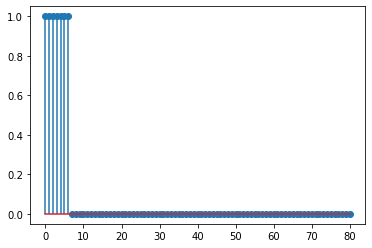

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 6

In [16]:
xdts = xz16

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[23.0],[26.0],[30.0],[45.0],[51.0],[55.0],[72.0],[81.0]]), 'Value': matlab.double([[1.989960534374894],[2997.559441866198],[-3.9813919137547282],[-5996.423202945348],[2.0743646870405423],[2995.789629028581],[0.1983466644568848],[-0.06768348551470409],[-0.04828973636853769],[2.496479415094337],[0.035026262242237656],[0.09452385465079714],[-0.007815610767826709],[8.248921888494484]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.98562902096774
2992.852521317974
-3.9763036937142964
-5987.567329167563
1.9988779200040339
2994.566374614491


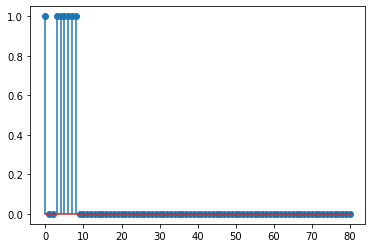

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y31 = []
    y32 = []
    y33 = []
    y34 = []
    y35 = []
    y36 = []
    y37 = []
    y38 = []
    
    xz17 = []
    xz18 = []
    
    xzs17 = []
    xzs18 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y31.append(x[-31,:])            
        y32.append(x[-32,:])
        y33.append(x[-33,:])         # Displacement     
        y34.append(x[-34,:])
        y35.append(x[-35,:])         # 
        y36.append(x[-36,:])              
        y37.append(x[-37,:])
        y38.append(x[-38,:])
        
        zint17 = x[-33, 0:-1]        # Velocity
        xfinal17 = x[-33, 1:] 
        xmz17 = (xfinal17 - zint17)
        
        zint18 = x[-35, 0:-1]        # Velocity
        xfinal18 = x[-35, 1:] 
        xmz18 = (xfinal18 - zint18) 

        xz17.append(xmz17)
        xz18.append(xmz18)
        
        xmzsq17 = np.multiply(xmz17, xmz17)
        xzs17.append(xmzsq17)
        
        xmzsq18 = np.multiply(xmz18, xmz18)
        xzs18.append(xmzsq18)
        
    xz17 = pow(dt,-1)*np.mean(np.array(xz17), axis = 0)
    xz18 = pow(dt,-1)*np.mean(np.array(xz18), axis = 0)

    xzs17 = pow(dt,-1)*np.mean(np.array(xzs17), axis = 0)
    xzs18 = pow(dt,-1)*np.mean(np.array(xzs18), axis = 0)

    y31 = np.array(y31)
    y32 = np.array(y32)
    y33 = np.array(y33)
    y34 = np.array(y34)
    y35 = np.array(y35)
    y36 = np.array(y36)
    y37 = np.array(y37)
    y38 = np.array(y38)

    time = t[0:-1]
    return xz17, xz18, xzs17, xzs18, y31, y32, y33, y34, y35, y36, y37, y38, time

In [4]:
xz17, xz18, xzs17, xzs18, y31, y32, y33, y34, y35, y36, y37, y38, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y31)):
    data = np.row_stack((y31[j,0:-1], y32[j,0:-1], y33[j,0:-1], y34[j,0:-1], y35[j,0:-1], y36[j,0:-1], y37[j,0:-1], y38[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz17
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[20.0],[24.0],[38.0],[64.0]]), 'Value': matlab.double([[0.1327206429295249],[2.03076883879684],[2999.5610665844565],[-3.966499962328691],[-5998.5685426496575],[2.03348613175562],[2999.307780589279],[-0.005133986589619265],[0.0021209127271544616],[-0.00650790874627794],[0.10693922364577096]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

2.0064045864978093
2994.4078519404666
-4.012196463914909
-5988.012296609312
2.0060507756250177
2993.4584411061032


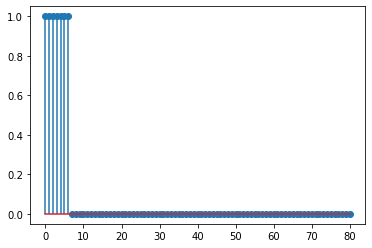

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 4

In [16]:
xdts = xz18

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[34.0],[51.0],[54.0],[64.0],[66.0],[68.0]]), 'Value': matlab.double([[1.9641123435919152],[2999.241097852081],[-3.945098074225355],[-5998.117774977731],[1.9955128872469095],[2997.114553245255],[0.007462414121757794],[-0.23871030169919955],[-0.0009161980234586679],[0.21912689427719875],[-0.003113388172250321],[0.00926530653233056]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

2.003870581443681
2995.5104018460484
-4.010279460375954
-5989.784169905727
1.9864022322107955
2992.599722524427


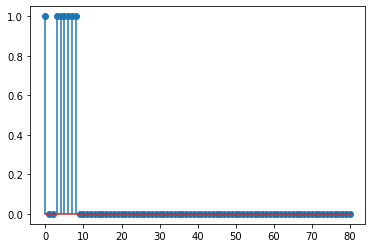

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y35 = []
    y36 = []
    y37 = []
    y38 = []
    y39 = []
    y40 = []
    y41 = []
    y42 = []
    
    xz19 = []
    xz20 = []
    
    xzs19 = []
    xzs20 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            

        y35.append(x[-35,:])        
        y36.append(x[-36,:])              
        y37.append(x[-37,:])         # 
        y38.append(x[-38,:])
        y39.append(x[-39,:])         #
        y40.append(x[-40,:])
        y41.append(x[-41,:])        
        y42.append(x[-42,:])

        
        zint19 = x[-37, 0:-1]        # Velocity
        xfinal19 = x[-37, 1:] 
        xmz19 = (xfinal19 - zint19)
        
        zint20 = x[-39, 0:-1]        # Velocity
        xfinal20 = x[-39, 1:] 
        xmz20 = (xfinal20 - zint20) 

        xz19.append(xmz19)
        xz20.append(xmz20)
        
        xmzsq19 = np.multiply(xmz19, xmz19)
        xzs19.append(xmzsq19)
        
        xmzsq20 = np.multiply(xmz20, xmz20)
        xzs20.append(xmzsq20)
        
    xz19 = pow(dt,-1)*np.mean(np.array(xz19), axis = 0)
    xz20 = pow(dt,-1)*np.mean(np.array(xz20), axis = 0)

    xzs19 = pow(dt,-1)*np.mean(np.array(xzs19), axis = 0)
    xzs20 = pow(dt,-1)*np.mean(np.array(xzs20), axis = 0)

    y35 = np.array(y35)
    y36 = np.array(y36)
    y37 = np.array(y37)
    y38 = np.array(y38)
    y39 = np.array(y39)
    y40 = np.array(y40)
    y41 = np.array(y41)
    y42 = np.array(y42)

    time = t[0:-1]
    return xz19, xz20, xzs19, xzs20, y35, y36, y37, y38, y39, y40, y41, y42, time

In [4]:
xz19, xz20, xzs19, xzs20, y35, y36, y37, y38, y39, y40, y41, y42, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y35)):
    data = np.row_stack((y35[j,0:-1], y36[j,0:-1], y37[j,0:-1], y38[j,0:-1], y39[j,0:-1], y40[j,0:-1], y41[j,0:-1], y42[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz19
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[10.0],[38.0],[44.0],[47.0],[54.0],[64.0]]), 'Value': matlab.double([[2.000564784558737],[2997.8212896979835],[-4.011590205953798],[-5998.379063195677],[2.115898690991753],[3000.0135842037985],[0.007111123655417825],[0.0016679669589331728],[0.17778107710784996],[0.04522603182106566],[-0.008349634701657779],[-0.08297073766518616]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.993968333712578
2992.438811087823
-4.022797352850086
-5987.074654692968
2.0278642439463197
2993.568082947166


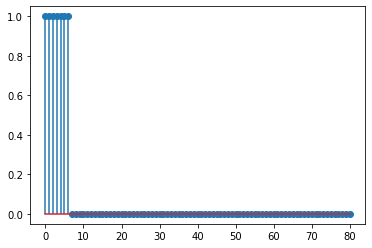

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 2

In [16]:
xdts = xz20

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[28.0],[37.0],[52.0],[55.0]]), 'Value': matlab.double([[2.058755292210478],[3004.94541786472],[-4.019263261253092],[-6008.31534068137],[2.0428020894751784],[3005.6667271850747],[-0.1009072292748944],[-0.1432976911282043],[0.002333514399514003],[-0.14040808863021295]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.9961389992338232
2997.770203503636
-4.006894532350776
-5992.989301531508
2.0280011684999084
2991.9358537257626


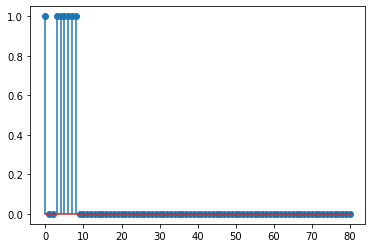

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y35 = []
    y36 = []
    y37 = []
    y38 = []
    y39 = []
    y40 = []
    y41 = []
    y42 = []
    
    xz19 = []
    xz20 = []
    
    xzs19 = []
    xzs20 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
                         
        y37.append(x[-37,:])         # 
        y38.append(x[-38,:])
        y39.append(x[-39,:])         #
        y40.append(x[-40,:])
        y41.append(x[-41,:])         #
        y42.append(x[-42,:])

        
        zint19 = x[-41, 0:-1]        # Velocity
        xfinal19 = x[-41, 1:] 
        xmz19 = (xfinal19 - zint19)
        

        xz19.append(xmz19)
        
        xmzsq19 = np.multiply(xmz19, xmz19)
        xzs19.append(xmzsq19)

    xz19 = pow(dt,-1)*np.mean(np.array(xz19), axis = 0)

    xzs19 = pow(dt,-1)*np.mean(np.array(xzs19), axis = 0)

    y37 = np.array(y37)
    y38 = np.array(y38)
    y39 = np.array(y39)
    y40 = np.array(y40)
    y41 = np.array(y41)
    y42 = np.array(y42)

    time = t[0:-1]
    return xz19, xzs19, y37, y38, y39, y40, y41, y42, time

In [4]:
xz19, xzs19, y37, y38, y39, y40, y41, y42, time = M_DOF_sys(x_initial, dof, T)

In [6]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y37)):
    data = np.row_stack((y37[j,0:-1], y38[j,0:-1], y39[j,0:-1], y40[j,0:-1], y41[j,0:-1], y42[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [7]:
xdts = xz19
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[14.0],[26.0]]), 'Value': matlab.double([[1.9663477802059508],[3000.6737711944907],[-3.9901048331316575],[-6000.570244137786],[0.0055544960354988885],[-0.0023514422380917677],[0.0031435219827562278]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

1.9710619223855972
2998.6391100391693
-3.984083429356548
-5998.5450813651705


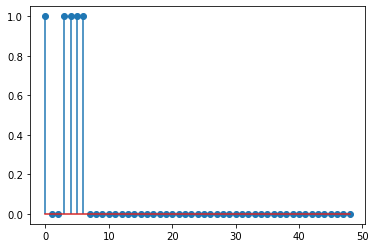

In [15]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Diffusion 21

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)

        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
            
    ind = len(D[0])
    
    return D, ind

In [38]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
  
        y1.append(x[-1,:])     # Displacement
        y2.append(x[-2,:])      
        y3.append(x[-3,:])     # Displacement
        y4.append(x[-4,:])
        y5.append(x[-5,:])
        y6.append(x[-6,:])
        y7.append(x[-7,:])
        y8.append(x[-8,:])
        

        zint1 = x[-1,0:-1]
        xfinal1 = x[-1,1:] 
        xmz1 = (xfinal1 - zint1)
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 

    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    
    time = t[0:-1]
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, y7, y8, time

In [39]:
T = 1
dof = 21
x_initial = np.zeros(2*dof)

In [41]:
xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, y7, y8, time_ = M_DOF_sys(x_initial, dof, T)

In [43]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [44]:
xdts = xzs11
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [47]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[8.0],[11.0],[25.0],[30.0],[34.0],[36.0],[40.0],[44.0],[50.0],[68.0],[70.0],[74.0],[81.0]]), 'Value': matlab.double([[1.0047808356643277],[0.06833581299706867],[0.8638284659695521],[-2.041101286100316],[-2.362997691764869],[0.15396010652952816],[-0.22035578525958419],[0.33357230552705275],[-0.2679695239600998],[0.300930393053831],[-0.2804027566179254],[-0.2904220501070378],[1.3161912608157038],[-22.39637936251321]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1

In [50]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


1.003521987767179


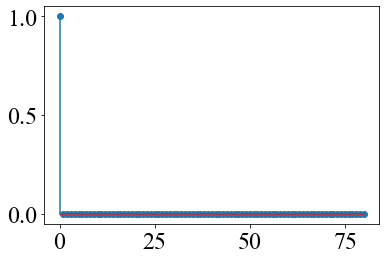

In [53]:
zmean21 = DS['zmean']
wmean21 = DS['wmean']
zmean21[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean21)
wmean21[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean21[0]))

# Diffusion 20

In [26]:
xdts = xzs22

In [27]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[7.0],[11.0],[14.0],[22.0],[33.0],[57.0],[64.0],[73.0]]), 'Value': matlab.double([[1.0091846008703866],[2.429582323364784],[2.330516849804251],[1.330512004452653],[0.014250350260624805],[-0.07881647569388553],[-75.37782043650094],[-2.1383648735396967],[0.445369865427977],[-0.7637924306420544]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D
y = xdts
initz0 = initz0
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)


1.0015403079287326


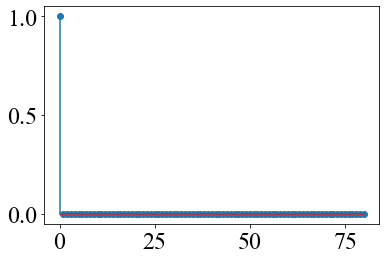

In [33]:
zmean20 = DS['zmean']
wmean20 = DS['wmean']
zmean20[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean20)
wmean20[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean20[0]))

# Diffusion 19

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    
    xz2 = []
    xz3 = []
    xz4 = []
    xz5 = []
    
    xzs22 = []
    xzs33 = []
    xzs44 = []
    xzs55 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        if ensemble%50==0:
            print(ensemble)
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            

        y3.append(x[-3,:])
        y4.append(x[-4,:])
        y5.append(x[-5,:])     # Displacement
        y6.append(x[-6,:])
        y7.append(x[-7,:])     # Displacement
        y8.append(x[-8,:])
        y9.append(x[-9,:])
        y10.append(x[-10,:])
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
                  
        zint4 = x[-7, 0:-1]
        xfinal4 = x[-7, 1:] 
        xmz4 = (xfinal4 - zint4)
        
        zint5 = x[-9, 0:-1]
        xfinal5 = x[-9, 1:] 
        xmz5 = (xfinal5 - zint5)
        
        xz2.append(xmz2)
        xz3.append(xmz3)
        xz4.append(xmz4)
        xz5.append(xmz5)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        xmzsq44 = np.multiply(xmz4, xmz4)
        xzs44.append(xmzsq44)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
    
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    xz4 = pow(dt,-1)*np.mean(np.array(xz4), axis = 0)
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)

    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    xzs44 = pow(dt,-1)*np.mean(np.array(xzs44), axis = 0)
    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)

    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)

    time = t[0:-1]
    return xz2, xz3, xz4, xz5, xzs22, xzs33, xzs44, xzs55, y3, y4, y5, y6, y7, y8, y9, y10, time

In [ ]:
import time
start = time.time()
xz2, xz3, xz4, xz5, xzs22, xzs33, xzs44, xzs55, y3, y4, y5, y6, y7, y8, y9, y10, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y3)):
    data = np.row_stack((y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1], y9[j,0:-1], y10[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.4169628063837685

In [17]:
xdts = xzs33
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')
Dict.shape

In [20]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[10.0],[16.0],[66.0]]), 'Value': matlab.double([[0.9902377164137997],[0.03770046080843809],[0.1735159119427114],[-0.0015400485285265032]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9948396401906255


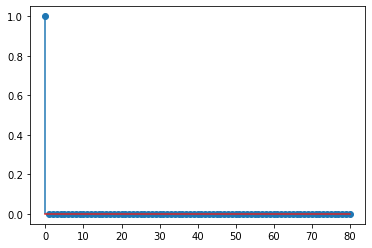

In [26]:
zmean19 = DS['zmean']
wmean19 = DS['wmean']
zmean19[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean19)
wmean19[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean19[0]))

# Diffusion 18

In [22]:
xdts = xzs44

In [23]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[2.0],[8.0],[10.0],[16.0],[32.0],[44.0]]), 'Value': matlab.double([[0.9829104962907175],[0.017684805522163984],[0.07839617389488117],[0.03304306719188128],[0.23271855134551253],[-6.470732580911453],[2.3007160450505806]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
X = D
y = xdts
initz0 = initz0
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)


0.9951885440082008


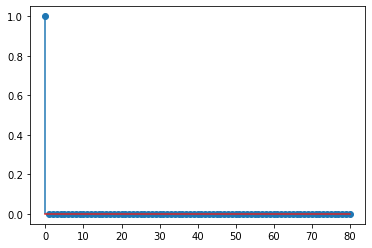

In [27]:
zmean18 = DS['zmean']
wmean18 = DS['wmean']
zmean18[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean18)
wmean18[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean18[0]))

# Diffusion 17

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run
    
    y7 = [] 
    y8 = []
    y9 = []
    y10 = []
    y11 = []
    y12 = []
    y13 = []
    y14 = []
    
    xz5 = []
    xz6 = []
    
    xzs55 = []
    xzs66 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y7.append(x[-7,:])
        y8.append(x[-8,:])
        y9.append(x[-9,:])         # Displacement
        y10.append(x[-10,:])
        y11.append(x[-11,:])       # Displacement
        y12.append(x[-12,:])
        y13.append(x[-13,:])
        y14.append(x[-14,:])
        
        zint5 = x[-9, 0:-1]        # Velocity
        xfinal5 = x[-9, 1:] 
        xmz5 = (xfinal5 - zint5)
        
        zint6 = x[-11, 0:-1]       # Velocity
        xfinal6 = x[-11, 1:] 
        xmz6 = (xfinal6 - zint6) 

        xz5.append(xmz5)
        xz6.append(xmz6)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
        xmzsq66 = np.multiply(xmz6, xmz6)
        xzs66.append(xmzsq66)
        
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)
    xz6 = pow(dt,-1)*np.mean(np.array(xz6), axis = 0)

    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)
    xzs66 = pow(dt,-1)*np.mean(np.array(xzs66), axis = 0)
    
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y11)
    y12 = np.array(y12)
    y13 = np.array(y13)
    y14 = np.array(y14)

    time = t[0:-1]
    return xz5, xz6, xzs55, xzs66, y7, y8, y9, y10, y11, y12, y13, y14, time

In [4]:
import time
start = time.time()
xz5, xz6, xzs55, xzs66, y7, y8, y9, y10, y11, y12, y13, y14, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

19.26790297428767

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y7)):
    data = np.row_stack((y7[j,0:-1], y8[j,0:-1], y9[j,0:-1], y10[j,0:-1], y11[j,0:-1], y12[j,0:-1], y13[j,0:-1], y14[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.142264139652252

In [8]:
xdts = xzs55
D = Dictionary

In [10]:
Dict = D.reshape(-1,order='F')
Dict.shape

(810000,)

In [11]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[7.0],[10.0],[14.0],[17.0],[22.0],[28.0],[42.0],[57.0]]), 'Value': matlab.double([[0.9856522615091673],[-5.7769476953383165],[0.1295363697115176],[0.03147533666869072],[1.3237589182557283],[-0.06687716389813055],[-2.401986797694255],[5.998084705771243],[1.1545312026326244]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9879038178340201


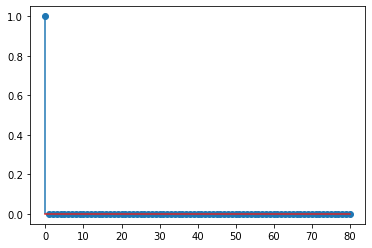

In [18]:
zmean17 = DS['zmean']
wmean17 = DS['wmean']
zmean17[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean17)
wmean17[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean17[0]))

# Diffusion 16

In [19]:
xdts = xzs66

In [20]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[10.0],[12.0],[17.0],[22.0],[68.0],[74.0]]), 'Value': matlab.double([[0.9986686919411943],[0.06107333439196258],[0.05112997931735707],[0.9286076095842783],[-0.16636177182023776],[0.24765371476749282],[-2.0997286353123954]])}


In [21]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9957340261966928


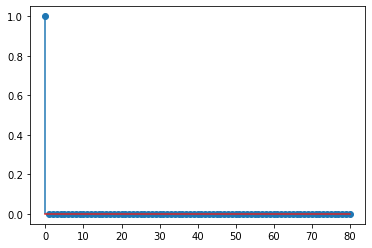

In [24]:
zmean16 = DS['zmean']
wmean16 = DS['wmean']
zmean16[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean16)
wmean16[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean16[0]))

# Diffusion 15

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y11 = []  
    y12 = []
    y13 = []
    y14 = []
    y15 = []
    y16 = []
    y17 = []
    y18 = []
    
    xz7 = []
    xz8 = []
    
    xzs77 = []
    xzs88 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y11.append(x[-11,:])       
        y12.append(x[-12,:])
        y13.append(x[-13,:])       # Displacement
        y14.append(x[-14,:])
        y15.append(x[-15,:])       # Displacement     
        y16.append(x[-16,:])
        y17.append(x[-17,:])       
        y18.append(x[-18,:])

        
        zint7 = x[-13, 0:-1]        # Velocity
        xfinal7 = x[-13, 1:] 
        xmz7 = (xfinal7 - zint7)
        
        zint8 = x[-15, 0:-1]       # Velocity
        xfinal8 = x[-15, 1:] 
        xmz8 = (xfinal8 - zint8) 

        xz7.append(xmz7)
        xz8.append(xmz8)
        
        xmzsq77 = np.multiply(xmz7, xmz7)
        xzs77.append(xmzsq77)
        
        xmzsq88 = np.multiply(xmz8, xmz8)
        xzs88.append(xmzsq88)
        
    xz7 = pow(dt,-1)*np.mean(np.array(xz7), axis = 0)
    xz8 = pow(dt,-1)*np.mean(np.array(xz8), axis = 0)

    xzs77 = pow(dt,-1)*np.mean(np.array(xzs77), axis = 0)
    xzs88 = pow(dt,-1)*np.mean(np.array(xzs88), axis = 0)

    y11 = np.array(y11)
    y12 = np.array(y12)
    y13 = np.array(y13)
    y14 = np.array(y14)
    y15 = np.array(y15)
    y16 = np.array(y16)
    y17 = np.array(y17)
    y18 = np.array(y18)

    time = t[0:-1]
    return xz7, xz8, xzs77, xzs88, y11, y12, y13, y14, y15, y16, y17, y18, time

In [4]:
import time
start = time.time()
xz7, xz8, xzs77, xzs88, y11, y12, y13, y14, y15, y16, y17, y18, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

20.859048147996265

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y11)):
    data = np.row_stack((y11[j,0:-1], y12[j,0:-1], y13[j,0:-1], y14[j,0:-1], y15[j,0:-1], y16[j,0:-1], y17[j,0:-1], y18[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.4062581896781925

In [7]:
xdts = xzs77
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')
Dict.shape

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[5.0],[10.0],[15.0],[16.0],[22.0],[25.0],[33.0],[36.0],[38.0],[62.0],[66.0],[76.0]]), 'Value': matlab.double([[0.9971517057741365],[-2.208784708696819],[0.08804737106915496],[1.1612198629373638],[0.03864005321671668],[-0.2710952538083632],[6.505291021506413],[-73.29105255806566],[0.16624307423825338],[-0.4635422765099648],[7.703174796530834],[-0.1503369728963538],[2.5409780686755505]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    

In [ ]:
D.shape, initz0.shape

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9931591580867489


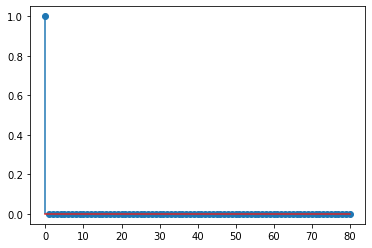

In [17]:
zmean15 = DS['zmean']
wmean15 = DS['wmean']
zmean15[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean15)
wmean15[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean15[0]))

# Diffusion 14

In [18]:
xdts = xzs88

In [19]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[12.0],[21.0],[29.0],[38.0],[39.0],[40.0],[48.0],[54.0],[66.0]]), 'Value': matlab.double([[0.9898238800188733],[0.1984746422085559],[-1.7640145233784053],[22.759960116207843],[0.16043836300211084],[4.804876679996905],[-0.5365290588344515],[2.621775577335877],[0.019734250831577486],[0.16141525748343863]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9910134166011874


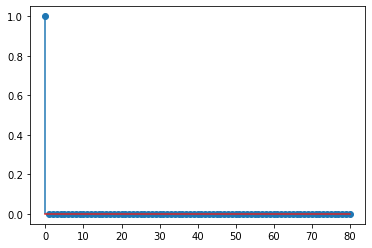

In [24]:
zmean14 = DS['zmean']
wmean14 = DS['wmean']
zmean14[np.where(np.diag(DS['wCOV'])>5e-5)] = 0
plt.stem(zmean14)
wmean14[np.where(np.diag(DS['wCOV'])>5e-5)] = 0
print()
print(np.sqrt(wmean14[0]))

# Diffusion 13

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y15 = []
    y16 = []
    y17 = []
    y18 = []
    y19 = []  
    y20 = []
    y21 = []
    y22 = []
    
    xz9 = []
    xz10 = []
    
    xzs9 = []
    xzs10 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y15.append(x[-15,:])           
        y16.append(x[-16,:])
        y17.append(x[-17,:])       # Displacement 
        y18.append(x[-18,:])
        y19.append(x[-19,:])       # Displacement         
        y20.append(x[-20,:])
        y21.append(x[-21,:])           
        y22.append(x[-22,:])

        
        zint9 = x[-17, 0:-1]        # Velocity
        xfinal9 = x[-17, 1:] 
        xmz9 = (xfinal9 - zint9)
        
        zint10 = x[-19, 0:-1]       # Velocity
        xfinal10 = x[-19, 1:] 
        xmz10 = (xfinal10 - zint10) 

        xz9.append(xmz9)
        xz10.append(xmz10)
        
        xmzsq9 = np.multiply(xmz9, xmz9)
        xzs9.append(xmzsq9)
        
        xmzsq10 = np.multiply(xmz10, xmz10)
        xzs10.append(xmzsq10)
        
    xz9 = pow(dt,-1)*np.mean(np.array(xz9), axis = 0)
    xz10 = pow(dt,-1)*np.mean(np.array(xz10), axis = 0)

    xzs9 = pow(dt,-1)*np.mean(np.array(xzs9), axis = 0)
    xzs10 = pow(dt,-1)*np.mean(np.array(xzs10), axis = 0)

    y15 = np.array(y15)
    y16 = np.array(y16)
    y17 = np.array(y17)
    y18 = np.array(y18)
    y19 = np.array(y19)
    y20 = np.array(y20)
    y21 = np.array(y21)
    y22 = np.array(y22)

    time = t[0:-1]
    return xz9, xz10, xzs9, xzs10, y15, y16, y17, y18, y19, y20, y21, y22, time

In [4]:
import time
start = time.time()
xz9, xz10, xzs9, xzs10, y15, y16, y17, y18, y19, y20, y21, y22, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60

19.68596785068512

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y15)):
    data = np.row_stack((y15[j,0:-1], y16[j,0:-1], y17[j,0:-1], y18[j,0:-1], y19[j,0:-1], y20[j,0:-1], y21[j,0:-1], y22[j,0:-1], ))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60

5.870998533566793

In [16]:
xdts = xzs9
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [19]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[14.0],[16.0],[17.0],[19.0],[36.0],[46.0],[48.0],[66.0],[76.0]]), 'Value': matlab.double([[0.9887861795793844],[0.16627148199625685],[0.020618577926066157],[0.6155326121163215],[0.9625336857653004],[0.18254947020856085],[2.955372415771637],[-5.0974527174618105],[0.016686824666610794],[0.2936330739605453]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9916373021096109


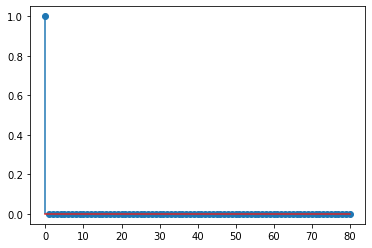

In [29]:
zmean13 = DS['zmean']
wmean13 = DS['wmean']
zmean13[np.where(np.diag(DS['wCOV'])>6.2e-4)] = 0
plt.stem(zmean13)
wmean13[np.where(np.diag(DS['wCOV'])>6.2e-4)] = 0
print()
print(np.sqrt(wmean13[0]))

# Diffusion 12

In [30]:
xdts = xzs10

In [31]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[7.0],[11.0],[16.0],[20.0],[26.0],[34.0],[36.0],[38.0],[53.0],[56.0],[60.0],[66.0],[68.0],[72.0]]), 'Value': matlab.double([[0.9865209229832042],[-3.3038173413435667],[0.36279558457966843],[0.20623872242677171],[0.14510573029054788],[2.1310335062326593],[-0.24825274089512409],[0.3334672657439126],[-0.13689974391090637],[-3.9553204569491047],[0.19512895868011365],[6.021401815032007],[-0.49036459275335337],[0.5573999164587363],[0.06858133601857361]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9923615546549273


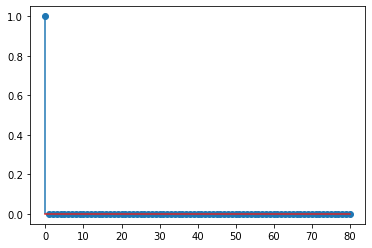

In [37]:
zmean12 = DS['zmean']
wmean12 = DS['wmean']
zmean12[np.where(np.diag(DS['wCOV'])>3e-5)] = 0
plt.stem(zmean12)
wmean12[np.where(np.diag(DS['wCOV'])>3e-5)] = 0
print()
print(np.sqrt(wmean12[0]))

# Diffusion 11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    
    y19 = []  
    y20 = []
    y21 = []
    y22 = []
    y23 = []
    y24 = []
    y25 = []
    y26 = []
    
    xz11 = []
    xz12 = []
    
    xzs11 = []
    xzs12 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y19.append(x[-19,:])                
        y20.append(x[-20,:])
        y21.append(x[-21,:])       # Displacement    
        y22.append(x[-22,:])
        y23.append(x[-23,:])       # Displacement             
        y24.append(x[-24,:])
        y25.append(x[-25,:])                
        y26.append(x[-26,:])

        
        zint11 = x[-21, 0:-1]        # Velocity
        xfinal11 = x[-21, 1:] 
        xmz11 = (xfinal11 - zint11)
        
        zint12 = x[-23, 0:-1]       # Velocity
        xfinal12 = x[-23, 1:] 
        xmz12 = (xfinal12 - zint12) 

        xz11.append(xmz11)
        xz12.append(xmz12)
        
        xmzsq11 = np.multiply(xmz11, xmz11)
        xzs11.append(xmzsq11)
        
        xmzsq12 = np.multiply(xmz12, xmz12)
        xzs12.append(xmzsq12)
        
    xz11 = pow(dt,-1)*np.mean(np.array(xz11), axis = 0)
    xz12 = pow(dt,-1)*np.mean(np.array(xz12), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs12 = pow(dt,-1)*np.mean(np.array(xzs12), axis = 0)

    y19 = np.array(y19)
    y20 = np.array(y20)
    y21 = np.array(y21)
    y22 = np.array(y22)
    y23 = np.array(y23)
    y24 = np.array(y24)
    y25 = np.array(y25)
    y26 = np.array(y26)

    time = t[0:-1]
    return xz11, xz12, xzs11, xzs12, y19, y20, y21, y22, y23, y24, y25, y26, time

In [4]:
import time
start = time.time()
xz11, xz12, xzs11, xzs12, y19, y20, y21, y22, y23, y24, y25, y26, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

21.792883121967314

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y19)):
    data = np.row_stack((y19[j,0:-1], y20[j,0:-1], y21[j,0:-1], y22[j,0:-1], y23[j,0:-1], y24[j,0:-1], y25[j,0:-1], y26[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.431408035755157

In [8]:
xdts = xzs11
D = Dictionary

In [10]:
Dict = D.reshape(-1,order='F')
Dict.shape

(810000,)

In [11]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[10.0],[16.0],[17.0],[41.0],[48.0],[56.0],[70.0],[81.0]]), 'Value': matlab.double([[0.9901238132330448],[0.16358128587352117],[0.016189251561629477],[0.5675585250561104],[-1.773903788783252],[10.063158752050205],[0.2885044675082408],[-0.09365842972938068],[-51.71240194306952]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9899188099863844


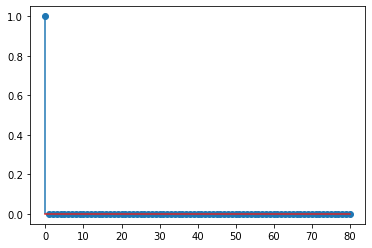

In [19]:
zmean11 = DS['zmean']
wmean11 = DS['wmean']
zmean11[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean11)
wmean11[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean11[0]))

# Diffusion 10

In [20]:
xdts = xzs12

In [21]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[4.0],[12.0],[16.0],[24.0],[32.0],[38.0],[41.0],[58.0],[73.0],[78.0]]), 'Value': matlab.double([[0.9819076967451932],[0.09140092181947508],[0.08689529174350885],[0.17319393019647966],[-0.007429900213746423],[-6.135093619475943],[-0.47396253646916475],[4.330390650614655],[5.6037754740846],[-0.6317503274629287],[-4.396070124654494]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9931791546845723


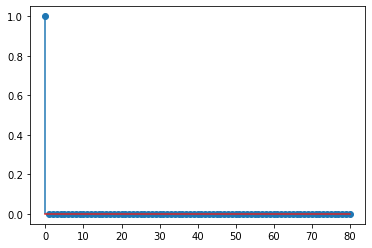

In [27]:
zmean10 = DS['zmean']
wmean10 = DS['wmean']
zmean10[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean10)
wmean10[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean10[0]))

# Diffusion 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000

    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y23 = []
    y24 = []
    y25 = []
    y26 = []
    y27 = []
    y28 = []
    y29 = []
    y30 = []
    
    xz13 = []
    xz14 = []
    
    xzs13 = []
    xzs14 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y23.append(x[-23,:])                
        y24.append(x[-24,:])
        y25.append(x[-25,:])         # Displacement      
        y26.append(x[-26,:])
        y27.append(x[-27,:])         # Displacement       
        y28.append(x[-28,:])
        y29.append(x[-29,:])                
        y30.append(x[-30,:])

        
        zint13 = x[-25, 0:-1]        # Velocity
        xfinal13 = x[-25, 1:] 
        xmz13 = (xfinal13 - zint13)
        
        zint14 = x[-27, 0:-1]        # Velocity
        xfinal14 = x[-27, 1:] 
        xmz14 = (xfinal14 - zint14) 

        xz13.append(xmz13)
        xz14.append(xmz14)
        
        xmzsq13 = np.multiply(xmz13, xmz13)
        xzs13.append(xmzsq13)
        
        xmzsq14 = np.multiply(xmz14, xmz14)
        xzs14.append(xmzsq14)
        
    xz13 = pow(dt,-1)*np.mean(np.array(xz13), axis = 0)
    xz14 = pow(dt,-1)*np.mean(np.array(xz14), axis = 0)

    xzs13 = pow(dt,-1)*np.mean(np.array(xzs13), axis = 0)
    xzs14 = pow(dt,-1)*np.mean(np.array(xzs14), axis = 0)

    y23 = np.array(y23)
    y24 = np.array(y24)
    y25 = np.array(y25)
    y26 = np.array(y26)
    y27 = np.array(y27)
    y28 = np.array(y28)
    y29 = np.array(y29)
    y30 = np.array(y30)

    time = t[0:-1]
    return xz13, xz14, xzs13, xzs14, y23, y24, y25, y26, y27, y28, y29, y30, time

In [4]:
import time
start = time.time()
xz13, xz14, xzs13, xzs14, y23, y24, y25, y26, y27, y28, y29, y30, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

19.836947782834372

In [5]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y23)):
    data = np.row_stack((y23[j,0:-1], y24[j,0:-1], y25[j,0:-1], y26[j,0:-1], y27[j,0:-1], y28[j,0:-1], y29[j,0:-1], y30[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.348912453651428

In [6]:
xdts = xzs13
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[14.0],[16.0],[44.0],[50.0],[52.0],[57.0],[68.0],[70.0]]), 'Value': matlab.double([[0.9953315641323672],[-2.578008394338965],[0.0804756041164806],[0.11949452233700361],[4.374260860132828],[0.017914940504955748],[-0.1987055707212403],[5.830412920022909],[0.0989211611745288],[-0.25998742837331373]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.997848155581177


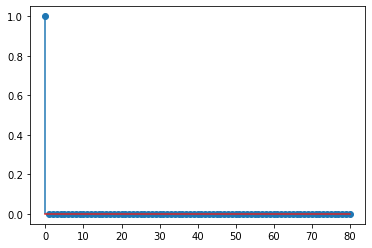

In [17]:
zmean11 = DS['zmean']
wmean11 = DS['wmean']
zmean11[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean11)
wmean11[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean11[0]))

# Diffusion 8

In [18]:
xdts = xzs14

In [19]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[8.0],[13.0],[35.0],[40.0],[43.0],[46.0],[64.0],[70.0],[72.0]]), 'Value': matlab.double([[1.0135729600244339],[-0.09887217872972166],[1.8562282044459353],[3.338671944468147],[-0.10557163554245222],[63.75725469730531],[0.40621090518523056],[-5.690473548031185],[0.16630413064128968],[-0.25557364028914115]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)


1.0088588591108991


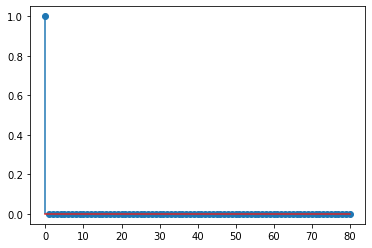

In [25]:
zmean10 = DS['zmean']
wmean10 = DS['wmean']
zmean10[np.where(np.diag(DS['wCOV'])>5e-3)] = 0
plt.stem(zmean10)
wmean10[np.where(np.diag(DS['wCOV'])>5e-3)] = 0
print()
print(np.sqrt(wmean10[0]))

# Diffusion 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y27 = []
    y28 = []
    y29 = []
    y30 = []
    y31 = []
    y32 = []
    y33 = []
    y34 = []
    
    xz15 = []
    xz16 = []
    
    xzs15 = []
    xzs16 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y27.append(x[-27,:])               
        y28.append(x[-28,:])
        y29.append(x[-29,:])         # Displacement     
        y30.append(x[-30,:])
        y31.append(x[-31,:])         # Displacement       
        y32.append(x[-32,:])
        y33.append(x[-33,:])               
        y34.append(x[-34,:])

        
        zint15 = x[-29, 0:-1]        # Velocity
        xfinal15 = x[-29, 1:] 
        xmz15 = (xfinal15 - zint15)
        
        zint16 = x[-31, 0:-1]        # Velocity
        xfinal16 = x[-31, 1:] 
        xmz16 = (xfinal16 - zint16) 

        xz15.append(xmz15)
        xz16.append(xmz16)
        
        xmzsq15 = np.multiply(xmz15, xmz15)
        xzs15.append(xmzsq15)
        
        xmzsq16 = np.multiply(xmz16, xmz16)
        xzs16.append(xmzsq16)
        
    xz15 = pow(dt,-1)*np.mean(np.array(xz15), axis = 0)
    xz16 = pow(dt,-1)*np.mean(np.array(xz16), axis = 0)

    xzs15 = pow(dt,-1)*np.mean(np.array(xzs15), axis = 0)
    xzs16 = pow(dt,-1)*np.mean(np.array(xzs16), axis = 0)

    y27 = np.array(y27)
    y28 = np.array(y28)
    y29 = np.array(y29)
    y30 = np.array(y30)
    y31 = np.array(y31)
    y32 = np.array(y32)
    y33 = np.array(y33)
    y34 = np.array(y34)

    time = t[0:-1]
    return xz15, xz16, xzs15, xzs16, y27, y28, y29, y30, y31, y32, y33, y34, time

In [3]:
import time
start = time.time()
xz15, xz16, xzs15, xzs16, y27, y28, y29, y30, y31, y32, y33, y34, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

20.050825802485146

In [6]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y27)):
    data = np.row_stack((y27[j,0:-1], y28[j,0:-1], y29[j,0:-1], y30[j,0:-1], y31[j,0:-1], y32[j,0:-1], y33[j,0:-1], y34[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.349144506454468

In [18]:
xdts = xzs15
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [21]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[10.0],[12.0],[13.0],[22.0],[64.0],[67.0],[68.0],[70.0],[74.0],[78.0]]), 'Value': matlab.double([[1.0004032275859442],[-2.272613032658588],[0.11947487685297736],[0.013417110925138392],[0.8218598011363294],[-0.20657964253455396],[-3.3376659400769877],[-1.2427217047199552],[0.23149533892618385],[-0.2606254604006703],[4.727761285888223],[6.188931023747849]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9975922728729321


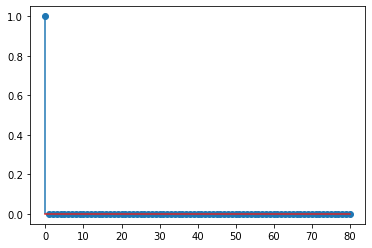

In [27]:
zmean7 = DS['zmean']
wmean7 = DS['wmean']
zmean7[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean7)
wmean7[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean7[0]))

# Diffusion 6

In [28]:
xdts = xzs16

In [29]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[7.0],[10.0],[12.0],[16.0],[23.0],[24.0],[26.0],[38.0],[72.0]]), 'Value': matlab.double([[0.9811435974614764],[-1.6860734313341124],[0.12000279381386893],[0.04198295454068612],[0.07839602636114816],[2.8290756293326247],[-0.2650175506186837],[1.3013933797444013],[-0.08931130839189087],[-0.05096229255460393]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.991153920774372


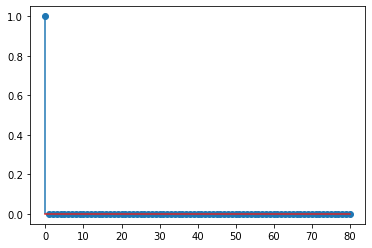

In [34]:
zmean6 = DS['zmean']
wmean6 = DS['wmean']
zmean6[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean6)
wmean6[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean6[0]))

# Diffusion 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y31 = []
    y32 = []
    y33 = []
    y34 = []
    y35 = []
    y36 = []
    y37 = []
    y38 = []
    
    xz17 = []
    xz18 = []
    
    xzs17 = []
    xzs18 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y31.append(x[-31,:])            
        y32.append(x[-32,:])
        y33.append(x[-33,:])         # Displacement     
        y34.append(x[-34,:])
        y35.append(x[-35,:])         # 
        y36.append(x[-36,:])              
        y37.append(x[-37,:])
        y38.append(x[-38,:])
        
        zint17 = x[-33, 0:-1]        # Velocity
        xfinal17 = x[-33, 1:] 
        xmz17 = (xfinal17 - zint17)
        
        zint18 = x[-35, 0:-1]        # Velocity
        xfinal18 = x[-35, 1:] 
        xmz18 = (xfinal18 - zint18) 

        xz17.append(xmz17)
        xz18.append(xmz18)
        
        xmzsq17 = np.multiply(xmz17, xmz17)
        xzs17.append(xmzsq17)
        
        xmzsq18 = np.multiply(xmz18, xmz18)
        xzs18.append(xmzsq18)
        
    xz17 = pow(dt,-1)*np.mean(np.array(xz17), axis = 0)
    xz18 = pow(dt,-1)*np.mean(np.array(xz18), axis = 0)

    xzs17 = pow(dt,-1)*np.mean(np.array(xzs17), axis = 0)
    xzs18 = pow(dt,-1)*np.mean(np.array(xzs18), axis = 0)

    y31 = np.array(y31)
    y32 = np.array(y32)
    y33 = np.array(y33)
    y34 = np.array(y34)
    y35 = np.array(y35)
    y36 = np.array(y36)
    y37 = np.array(y37)
    y38 = np.array(y38)

    time = t[0:-1]
    return xz17, xz18, xzs17, xzs18, y31, y32, y33, y34, y35, y36, y37, y38, time

In [ ]:
import time
start = time.time()
xz17, xz18, xzs17, xzs18, y31, y32, y33, y34, y35, y36, y37, y38, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

In [ ]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y31)):
    data = np.row_stack((y31[j,0:-1], y32[j,0:-1], y33[j,0:-1], y34[j,0:-1], y35[j,0:-1], y36[j,0:-1], y37[j,0:-1], y38[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

In [10]:
xdts = xzs17
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [13]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[6.0],[9.0],[10.0],[13.0],[23.0],[24.0],[40.0],[60.0],[66.0],[68.0]]), 'Value': matlab.double([[1.0016807730353334],[0.013072647804788002],[-0.6057617180505847],[0.06970042916874226],[2.098301547018932],[-3.6468439048969015],[0.5003017632994207],[-0.33739058061783406],[-1.578768031065037],[-0.2958160341481349],[0.38074201478010244]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


1.0254642808547945


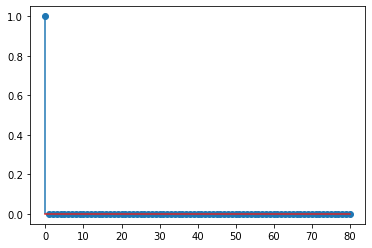

In [26]:
zmean5 = DS['zmean']
wmean5 = DS['wmean']
zmean5[np.where(np.diag(DS['wCOV'])>2e-5)] = 0
plt.stem(zmean5)
wmean5[np.where(np.diag(DS['wCOV'])>2e-5)] = 0
print()
print(np.sqrt(wmean5[0]))

# Diffusion 4

In [33]:
xdts = xzs18

In [34]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[14.0],[15.0],[28.0],[32.0],[39.0],[51.0],[62.0],[66.0],[67.0],[68.0],[70.0],[73.0]]), 'Value': matlab.double([[1.0032862048098872],[0.016253418600523338],[3.526279990043914],[7.123822225893731],[-7.45176274109187],[3.3795995416030897],[3.563219347335504],[2.4216844147637526],[-0.4365576745901151],[1.9891473198417193],[0.16654464890226187],[-0.2788701688923499],[0.26423980768792615]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9952174826668923


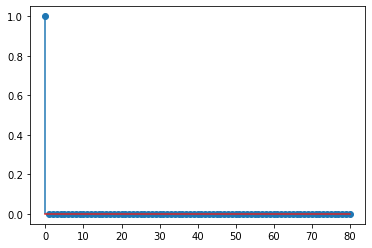

In [38]:
zmean4 = DS['zmean']
wmean4 = DS['wmean']
zmean4[np.where(np.diag(DS['wCOV'])>5e-5)] = 0
plt.stem(zmean4)
wmean4[np.where(np.diag(DS['wCOV'])>5e-5)] = 0
print()
print(np.sqrt(wmean4[0]))

# Diffusion 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y35 = []
    y36 = []
    y37 = []
    y38 = []
    y39 = []
    y40 = []
    y41 = []
    y42 = []
    
    xz19 = []
    xz20 = []
    
    xzs19 = []
    xzs20 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            

        y35.append(x[-35,:])        
        y36.append(x[-36,:])              
        y37.append(x[-37,:])         # 
        y38.append(x[-38,:])
        y39.append(x[-39,:])         #
        y40.append(x[-40,:])
        y41.append(x[-41,:])        
        y42.append(x[-42,:])

        
        zint19 = x[-37, 0:-1]        # Velocity
        xfinal19 = x[-37, 1:] 
        xmz19 = (xfinal19 - zint19)
        
        zint20 = x[-39, 0:-1]        # Velocity
        xfinal20 = x[-39, 1:] 
        xmz20 = (xfinal20 - zint20) 

        xz19.append(xmz19)
        xz20.append(xmz20)
        
        xmzsq19 = np.multiply(xmz19, xmz19)
        xzs19.append(xmzsq19)
        
        xmzsq20 = np.multiply(xmz20, xmz20)
        xzs20.append(xmzsq20)
        
    xz19 = pow(dt,-1)*np.mean(np.array(xz19), axis = 0)
    xz20 = pow(dt,-1)*np.mean(np.array(xz20), axis = 0)

    xzs19 = pow(dt,-1)*np.mean(np.array(xzs19), axis = 0)
    xzs20 = pow(dt,-1)*np.mean(np.array(xzs20), axis = 0)

    y35 = np.array(y35)
    y36 = np.array(y36)
    y37 = np.array(y37)
    y38 = np.array(y38)
    y39 = np.array(y39)
    y40 = np.array(y40)
    y41 = np.array(y41)
    y42 = np.array(y42)

    time = t[0:-1]
    return xz19, xz20, xzs19, xzs20, y35, y36, y37, y38, y39, y40, y41, y42, time

In [ ]:
import time
start = time.time()
xz19, xz20, xzs19, xzs20, y35, y36, y37, y38, y39, y40, y41, y42, time_ = M_DOF_sys(x_initial, dof, T)

In [6]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y35)):
    data = np.row_stack((y35[j,0:-1], y36[j,0:-1], y37[j,0:-1], y38[j,0:-1], y39[j,0:-1], y40[j,0:-1], y41[j,0:-1], y42[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

5.393276619911194

In [7]:
xdts = xzs19
D = Dictionary

In [ ]:
Dict = D.reshape(-1,order='F')

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[6.0],[13.0],[14.0],[16.0],[21.0],[27.0],[32.0],[38.0],[58.0]]), 'Value': matlab.double([[0.9904825352434724],[0.09945833063129142],[0.5275949022920007],[0.10789027323677451],[0.09969911004305786],[-1.253850794084635],[34.01246409006031],[1.042994287115904],[-0.4438090621349935],[-0.12908973332471121]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9941014579491846


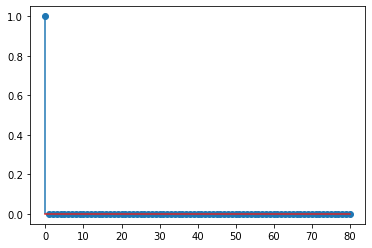

In [17]:
zmean13 = DS['zmean']
wmean13 = DS['wmean']
zmean13[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
plt.stem(zmean13)
wmean13[np.where(np.diag(DS['wCOV'])>5e-4)] = 0
print()
print(np.sqrt(wmean13[0]))

# Diffusion 2

In [18]:
xdts = xzs20

In [19]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[10.0],[15.0],[16.0],[20.0],[39.0],[50.0],[51.0],[52.0],[57.0],[70.0],[73.0],[81.0]]), 'Value': matlab.double([[0.9863877235342399],[0.1789696288868821],[1.2126479352123791],[0.027799401226600916],[-0.008110598775003393],[13.06618091201545],[0.6080261937592515],[8.55764887631481],[-0.5359061184082317],[-26.94846828259613],[-0.31954538263831705],[27.12007419340602],[946.9765652762065]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 


0.9906794734779988


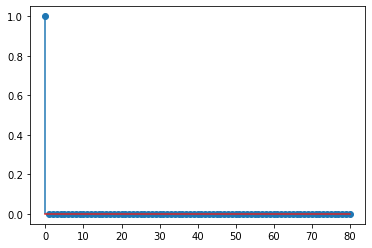

In [24]:
zmean12 = DS['zmean']
wmean12 = DS['wmean']
zmean12[np.where(np.diag(DS['wCOV'])>3e-4)] = 0
plt.stem(zmean12)
wmean12[np.where(np.diag(DS['wCOV'])>3e-4)] = 0
print()
print(np.sqrt(wmean12[0]))

# Diffusion 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0001
    t = np.arange(0, T+dt, dt)
    Nsamp = 200 # no. of samples in the run

    y35 = []
    y36 = []
    y37 = []
    y38 = []
    y39 = []
    y40 = []
    y41 = []
    y42 = []
    
    xz19 = []
    xz20 = []
    
    xzs19 = []
    xzs20 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
                         
        y37.append(x[-37,:])         # 
        y38.append(x[-38,:])
        y39.append(x[-39,:])         #
        y40.append(x[-40,:])
        y41.append(x[-41,:])         #
        y42.append(x[-42,:])

        
        zint19 = x[-41, 0:-1]        # Velocity
        xfinal19 = x[-41, 1:] 
        xmz19 = (xfinal19 - zint19)
        

        xz19.append(xmz19)
        
        xmzsq19 = np.multiply(xmz19, xmz19)
        xzs19.append(xmzsq19)

    xz19 = pow(dt,-1)*np.mean(np.array(xz19), axis = 0)

    xzs19 = pow(dt,-1)*np.mean(np.array(xzs19), axis = 0)

    y37 = np.array(y37)
    y38 = np.array(y38)
    y39 = np.array(y39)
    y40 = np.array(y40)
    y41 = np.array(y41)
    y42 = np.array(y42)

    time = t[0:-1]
    return xz19, xzs19, y37, y38, y39, y40, y41, y42, time

In [ ]:
import time
start = time.time()
xz19, xzs19, y37, y38, y39, y40, y41, y42, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

In [ ]:
startD = time.time()
# Expected Dictionary Creation:
libr = []
for j in range(len(y37)):
    data = np.row_stack((y37[j,0:-1], y38[j,0:-1], y39[j,0:-1], y40[j,0:-1], y41[j,0:-1], y42[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
print()
endD = time.time()
TIMED = (endD - startD)/60
TIMED

In [11]:
xdts = xzs19
D = Dictionary

In [13]:
Dict = D.reshape(-1,order='F')
Dict.shape

(490000,)

In [14]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[13.0],[16.0],[17.0],[18.0],[25.0],[31.0]]), 'Value': matlab.double([[0.9911631499197776],[11.7442354204679],[0.14516210033526056],[-11.893665126435351],[0.4469881333734123],[76.16620332698977],[-2.8032948609811044]])}


In [ ]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

In [ ]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)


1.0203663496547075


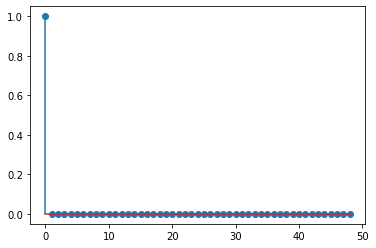

In [20]:
zmean1 = DS['zmean']
wmean1 = DS['wmean']
zmean1[np.where(np.diag(DS['wCOV'])>2e-5)] = 0
plt.stem(zmean1)
wmean1[np.where(np.diag(DS['wCOV'])>2e-5)] = 0
print()
print(np.sqrt(wmean1[0]))

# True Prediction

In [1]:
import numpy as np
import pickle 

Nsamp = 10000
dt = 0.001
T = 3
dof = 21
t = np.arange(0, T+dt, dt)
dW = np.sqrt(dt)*np.random.randn(Nsamp, t.shape[0], 2*dof)

pickle.dump(dW, open('Forcing_Term_MDOF.p', 'wb'))

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_MDOF.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 10000  # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0       
        if ensemble%10==0:
            print('ensemble  : ',ensemble)
        for n in range(len(t)-1):
            '''LINEAR PART DRIFT'''
            A = drift_mat(dof,k,c,m)
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW[ensemble][i]    
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y1.append(x[-1,:])   
        y2.append(x[-2,:])      

    y1 = np.array(y1)
    y2 = np.array(y2)

    return y1, y2

In [3]:
np.random.seed(1)
T = 3
dof = 21
x_initial = np.zeros(2*dof)

In [ ]:
import time 
start = time.time()
y1, y2 = M_DOF_sys(x_initial, dof, T)
end = time.time()
print('Total time : ', (end-start)/60, '  min')

In [6]:
pickle.dump(y2, open('MDOF_actual_relia.p', 'wb'))

# Estimated value prediction

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_MDOF.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
reverse_arr = [
[-1.9856578360681794
,-2999.1054873824546
,2.000594188269195
,2999.421070107903]
,
[1.9993880674656803
,2998.751240420418
,-4.004425002532981
,-5998.559737234919
,1.983354401651775
,2999.9804929627767]

,
[1.996019659650603
,2998.1820045623476
,-3.987879225886737
,-5995.060773070505
,1.9985362835677112
,2996.4584540504925]
,

[1.9923740734765514
,2996.245771840961
,-4.003049477280969
,-5992.0037657290295
,2.0103310724543872
,2995.17468795253]
,

[1.9903495270787748
,2998.0981101181233
,-3.994933600084622
,-5996.061077113376
,1.9677395409015634
,2998.1635345032882]

,
[2.0184651208568294
,2998.6859393507852
,-4.013114574041832
,-5999.281885073903
,2.0082113462257722
,3000.7909039506276]

,
[2.0315832268965677
,2998.1430900690357
,-4.0125547137838815
,-5995.891507106089
,2.0348119808240726
,2997.396188667701]

,
[1.9858062831074283
,2996.759148055798
,-3.9835494379162357
,-5994.755364268647
,2.0080597987567144
,2997.543372325106]

,
[1.979841912935129
,2997.5049710046123
,-3.97780877166546
,-5996.012284491217
,1.9838493670140263
,2998.373479074605]

,
[1.9833756187404543
,2998.0413562761296
,-3.9941528472406467
,-5995.655950234483
,2.0060493894186107
,2998.14921073922
 ]
,
[2.010651978135515
,2995.303927591743
,-3.991046283337433
,-5992.480161357249
,2.011565108911237
,2996.3421381542726]

,
[1.9891507455464754
,2997.225156924738
,-3.9954768388570536
,-5993.755010355408
,1.9979328203945448
,2996.4422466945043]
,

[1.994151369277238
,2996.4682007949355
,-4.008009864622892
,-5994.161063061209
,1.9737644876973743
,2997.002237861422]
,
[2.0131723478710017
,2996.496308680628
,-3.9880382130431014
,-5992.291368239411
,1.9961713333240416
,2995.8048619707147]
,

[1.9834191248660422
,2994.1484681705238
,-3.997373785900647
,-5987.325660253337
,1.9942890233748591
,2992.521744769699]

,
[1.98562902096774
,2992.852521317974
,-3.9763036937142964
,-5987.567329167563
,1.9988779200040339
,2994.566374614491]
,
[2.0064045864978093
,2994.4078519404666
,-4.012196463914909
,-5988.012296609312
,2.0060507756250177
,2993.4584411061032]
,
[2.003870581443681
,2995.5104018460484
,-4.010279460375954
,-5989.784169905727
,1.9864022322107955
,2992.599722524427]
,
[1.993968333712578
,2992.438811087823
,-4.022797352850086
,-5987.074654692968
,2.0278642439463197
,2993.568082947166]
,
[1.9961389992338232
,2997.770203503636
,-4.006894532350776
,-5992.989301531508
,2.0280011684999084
,2991.9358537257626]
,
[1.9710619223855972
,2998.6391100391693
,-3.984083429356548
,-5998.5450813651705]
    
]

In [3]:
theta = []

for i in range(20, -1, -1):
    theta.append(reverse_arr[i])

In [4]:
def drift_mat(dof, Theta):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    p = 0
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = Theta[p][3]
            A[i][i] = Theta[p][2]
            A[i][i+1] = Theta[p][1]
            A[i][i+2] = Theta[p][0]
            p += 1
    
        elif(i==dim-1):
            A[i][i] = Theta[p][0]
            A[i][i-1] = Theta[p][1]
            A[i][i-2] = Theta[p][2]
            A[i][i-3] = Theta[p][3]
            p += 1
            
        else:
            A[i][i-3] = Theta[p][5]
            A[i][i-2] = Theta[p][4]
            A[i][i-1] = Theta[p][3]
            A[i][i] = Theta[p][2]
            A[i][i+1] = Theta[p][1]
            A[i][i+2] = Theta[p][0]
            p += 1
    return A

In [6]:
import numpy as np
dof = 21
A = drift_mat(dof, theta)

In [7]:
diff_arr_iden = [1.003,1.00, 0.994,0.99,0.987,0.995,0.993,0.991,0.991,0.992,0.989,0.993,0.997,1.00,0.997,0.991,1.02,0.995,0.994,0.99,1.02]

In [8]:
'''DIFFUSION TERM  = b'''
diffu_arr = np.zeros(2*dof)
q = 0
for i in range(2*dof):
    if (i%2 != 0):
        diffu_arr[i] = diff_arr_iden[q]
        q += 1

In [11]:
def M_DOF_sys(x_initial, T, A, diffu_arr):
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 10000  # no. of samples in the run
    y2 = []
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0       
        if ensemble%10==0:
            print('ensemble  : ',ensemble)
        for n in range(len(t)-1):
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW[ensemble][i]    
            x0 = soln_arr
            x = np.column_stack((x, x0))
             
        y2.append(x[-2,:])      
    y2 = np.array(y2)
    return  y2

In [ ]:
import time 
start = time.time()
T = 3
dof = 21
x_initial = np.zeros(2*dof)

y2 = M_DOF_sys(x_initial, T, A, diffu_arr)
end = time.time()
print('Total time : ', (end-start)/60, '  min')

In [14]:
pickle.dump(y2, open('MDOF_Final_relia_dt_0.001_T_3_sec.p', 'wb'))

# Reliability

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Actual data

file_data = "MDOF_actual_relia.p"
fileobj_data = open(file_data, 'rb')
MDOF = pickle.load(fileobj_data)

output = MDOF
output = np.array(output)

In [2]:
file_data_F = 'MDOF_Final_relia_dt_0.001_T_3_sec.p' # Prediction data
fileobj_data_F = open(file_data_F, 'rb')
MDOF_F = pickle.load(fileobj_data_F)

output_F = MDOF_F
output_F = np.array(output_F)

## Y1 Actual

In [10]:
output.shape

(10000, 3001)

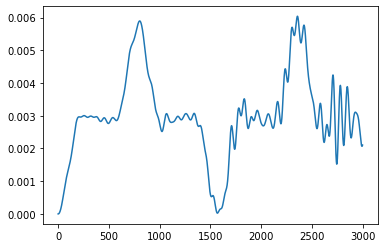

In [3]:
plt.plot(np.mean(output, axis=0))

In [ ]:
threshold = 2.5
ensem = output.shape[0]
time = output.shape[1] 

import matplotlib.pyplot as plt

idx = [np.where(output[i,:]>threshold) for i in range(ensem)]
# idx
count = 0 
for i in idx:
    if len(i[0]) != 0:
        count += 1
print("Probability of Failure :", count/ensem)


ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/100)
    else:
        ans.append(time/100)
        
plt.hist(ans, density=True)
plt.xlabel('time in Sec')
plt.ylabel('Number of Failure')
plt.show()


pf_count_per_t_1 = set() 
prob_fail_1 = []


for i in range(time):
    
    colmn = output[:, i]
    ans = np.where(colmn > threshold)
    for i in ans[0]:
        pf_count_per_t_1.add(i)
    
    no_of_fail_1 = len(pf_count_per_t_1)
    prob_fail_1.append(no_of_fail_1/ensem)
    
    
final_pf = []
for i in range(len(prob_fail_1)):
    if i%100==0:
        final_pf.append(prob_fail_1[i])

plt.plot(final_pf,color='green',linewidth=3)
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.show()


ensem_F = output_F.shape[0]
time_F = output_F.shape[1] 


idx_F = [np.where(output_F[i,:]> threshold) for i in range(ensem_F)]
# idx
count_F = 0 
for i in idx_F:
    if len(i[0]) != 0:
        count_F += 1
        
print("Probability of Failure :", count_F/ensem_F)


ans_F = []
for i in idx_F:
    if len(i[0])!=0:
        ans_F.append((i[0][0])/100)
    else:
        ans_F.append(time_F/100)
        
plt.hist(ans_F, density=True)
plt.xlabel('time in Sec')
plt.ylabel('Number of Failure')
plt.show()


pf_count_per_t_1_F = set() 
prob_fail_1_F = []


for i in range(time_F):
    
    colmn_F = output_F[:, i]
    ans_F = np.where(colmn_F > threshold)
    for i in ans_F[0]:
        pf_count_per_t_1_F.add(i)
    
    no_of_fail_1_F = len(pf_count_per_t_1_F)
    prob_fail_1_F.append(no_of_fail_1_F/ensem_F)
    
    
final_pf_F = []
for i in range(len(prob_fail_1_F)):
    if i%100==0:
        final_pf_F.append(prob_fail_1_F[i])
    
plt.plot(prob_fail_1_F,color='green',linewidth=3)
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.show()

plt.plot(prob_fail_1='green',linewidth=3, label='Actual')
plt.plot(prob_fail_1_F,color='red',linewidth=3, label='Final')
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.legend()
plt.show()
plt.figure()

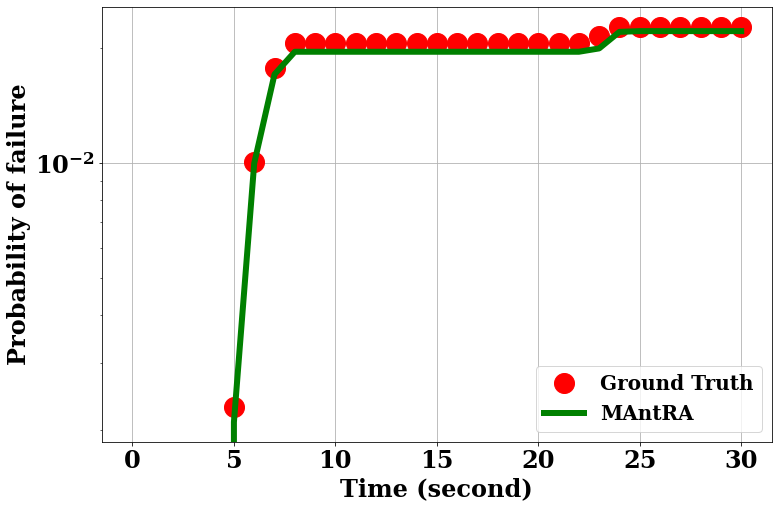

In [203]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 24
plt.figure(figsize = (12,8 ))
plt.semilogy(final_pf, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_pf_F,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=4)
plt.grid()
plt.savefig('reliability Mdofx.pdf')
plt.show()